# Feature transformation

The first part of this introduction to dimensionality reduction focuses on feature **transformation**. We will apply linear and nonlinear approaches used in machine learning to represent high-dimensional data in a lower-dimensional space.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Dataset

We will use a gene expression dataset of tomato plants. For each plant sample, we have expression measurements for more than 28k genes. They tell us something about the biological processes going on in the plant when the sample was taken. The dataset was downloaded from GEO, one of the major public repositories for gene expression data ([link](https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE45774&format=file&file=GSE45774_rpkm_all.txt.gz)), and is associated with a [PNAS publication](https://www.pnas.org/doi/full/10.1073/pnas.1309606110).

There are 24 samples, which cover all combinations of three experimental factors:
- Plant tissue: floral tissue, leaf, root, seedling, stem, vegetative tissue
- Tomato species: Solanum lycopersicum M82 (domesticated), Solanum pennellii (wild, desert-adapted)
- Growing position: sun, shade

For convenience, we provide a reformatted version of the data.

In [25]:
data_with_labels = pd.read_csv("./data/tomatos_with_targets.txt", index_col=0)
data_with_labels.head()

,Solyc02g081130.1.1,Solyc12g038200.1.1,Solyc00g097760.1.1,Solyc08g069180.2.1,Solyc01g012570.1.1,Solyc08g076670.2.1,Solyc04g024840.2.1,Solyc09g074310.2.1,Solyc09g005370.1.1,Solyc12g098180.1.1,...,Solyc01g088670.1.1,Solyc06g063380.1.1,Solyc10g050450.1.1,Solyc07g051990.1.1,Solyc02g093490.2.1,Solyc10g007270.2.1,species,position,tissue,root
penn.Sh.floral,1.169216,0.000000,0.0,1.305753,0.0,4.634343,2.860965,3.242561,0.0,0.0,...,2.120579,0.0,0.000000,0.0,5.027894,0.0,penn,Sh,floral,0
penn.Sh.leaf,0.000000,0.858644,0.0,2.948383,0.0,4.653912,2.241161,2.922573,0.0,0.0,...,1.370140,0.0,2.006256,0.0,5.068390,0.0,penn,Sh,leaf,0
penn.Sh.root,0.000000,0.000000,0.0,0.469958,0.0,5.798938,3.217704,2.229663,0.0,0.0,...,1.970763,0.0,1.688588,0.0,4.889667,0.0,penn,Sh,root,1
penn.Sh.sdling,1.813992,0.000000,0.0,2.586147,0.0,4.771861,3.099842,3.452604,0.0,0.0,...,1.982446,0.0,1.651062,0.0,3.105620,0.0,penn,Sh,sdling,0
penn.Sh.stem,0.000000,0.000000,0.0,1.540887,0.0,4.907770,4.800873,1.973890,0.0,0.0,...,1.452937,0.0,0.000000,0.0,4.993720,0.0,penn,Sh,stem,0


## Principal component analysis

How can we check which samples are (dis)similar to each other? Does the species or the growing position have a greater influence on the gene expression? Clearly, it is not an option to visualize all 28k gene expression levels of each sample. Principal component analysis (PCA) is a suitable first approach to reduce the dimensionality and visualize your dataset.

In [26]:
labels = ['species','position','tissue','root']
data_original = data_with_labels.drop(columns = labels, axis = 1)
scaler = StandardScaler().set_output(transform="default")
data = scaler.fit_transform(data_original)
pc = PCA(n_components=10)
data_transformed = pc.fit_transform(data)

First, we visualize the data based on the first two principal components. This will show us the main sources of variation. Since we do not have any prior knowledge which experimental factors have the greatest influence on the gene expression, we use all the label information that is available to us to mark the samples (here, the color indicates the tissue, and the shape indicates the combination of species and growing condition). What is the main source of variation in this data set? Side remark: If we have more label combinations than can be distinguished in one plot, we can produce multiple plots, e.g. one for each labeling type (tissue, species, condition).

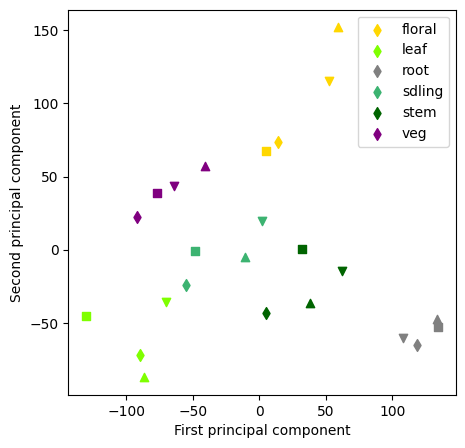

In [27]:
tissue_dict = {'floral': 'gold', 'leaf': 'chartreuse', 'root': 'gray', 'sdling': 'mediumseagreen', 'stem': 'darkgreen', 'veg': 'purple'}
species_condition_dict = {'penn.Sun': 's', 'penn.Sh': 'd', 'M82.Sun': '^', 'M82.Sh': 'v'}
plt.figure(figsize=(5, 5))
for i in range(0,data_transformed.shape[0]):
    plt.scatter(data_transformed[i,0], data_transformed[i,1], marker=species_condition_dict['.'.join([data_with_labels.iloc[i]['species'], data_with_labels.iloc[i]['position']])], c=tissue_dict[data_with_labels.iloc[i]['tissue']])
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend(tissue_dict, loc="upper right")
plt.show()

The plot reveals that the tissue type is the main source of variation in the data. Samples of the same tissue type are clustered together. Furthermore, the second principal component puts floral tissue and leaf tissue to opposite extremes, separating them from all other tissues.

Next, we will also have a look at the third principal component (at index 2) and check its combinations with the first two components.

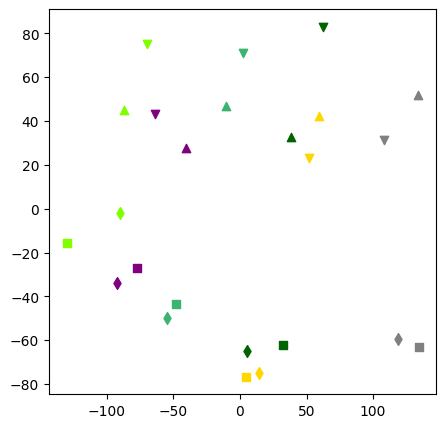

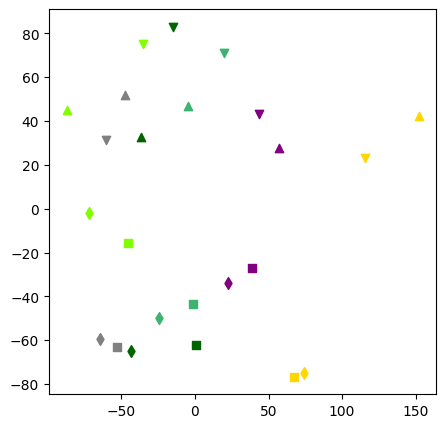

In [29]:
xval = [0,1]
yval = [2,2]
for k in range(0,len(xval)):
    plt.figure(figsize=(5, 5))
    for i in range(0,data_transformed.shape[0]):
        plt.scatter(data_transformed[i,xval[k]], data_transformed[i,yval[k]], marker=species_condition_dict['.'.join([data_with_labels.iloc[i]['species'], data_with_labels.iloc[i]['position']])], c=tissue_dict[data_with_labels.iloc[i]['tissue']])
    plt.show()

Clearly, the third principal component separates the squares and diamonds from the triangles, i.e. it separates the two species. By changing xval and yval, you can visualize combinations with even higher principal components. However, they do not contain a separation of growing conditions, so this factor does not play a big role for the gene expression variation in this data set. How should we decide on the number of principal components to include in further analyses? Here we knew from our labels that it might be worthwile to go beyond tissue effects, but in general scientists typically interrogate the cumulative explained variance to see how many components are needed to retain a certain percentage of variance (e.g. 75%).

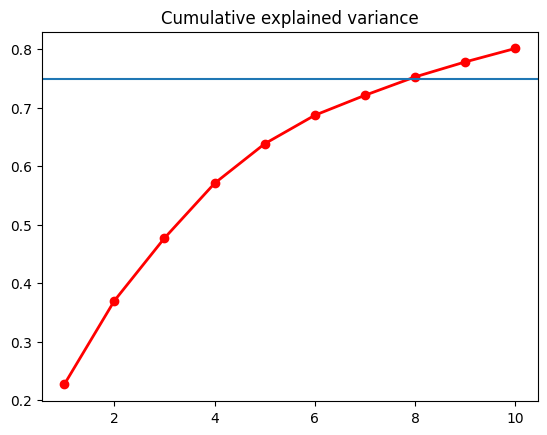

In [30]:
pc.explained_variance_ratio_
pc.explained_variance_ratio_.cumsum()
PC_values = np.arange(pc.n_components_) + 1
plt.plot(PC_values, pc.explained_variance_ratio_.cumsum(), 'ro-', linewidth=2)
plt.axhline(0.75)
plt.title('Cumulative explained variance')
plt.show()

Thus, we decide for instance to go with the top 8 principal components, so we have 8-dimensional representations of our samples instead of 28k-dimensional representations. Note that each principal component is a linear combination of all gene expression values. For example, we saw before that the third principal component separates the two species. Here we show a histogram presentation of the third principal component values across all samples, colored by species.

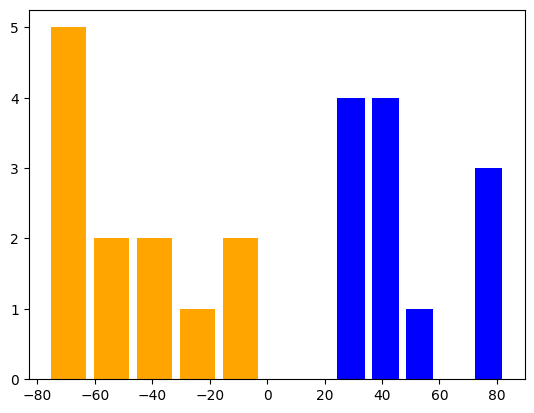

In [31]:
w = np.where(data_with_labels['species']=='M82')
plt.hist(data_transformed[w,2], bins=5, density=False, histtype='barstacked', rwidth=0.8, facecolor='blue')
plt.hist(np.delete(data_transformed[:,2], w), bins=5, density=False, histtype='barstacked', rwidth=0.8, facecolor='orange')
plt.show()

Going back to gene space, the top-weight gene of the third principal component also shows distinct expression levels in the two species.

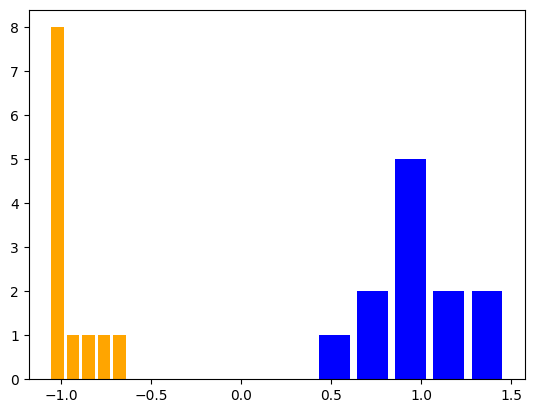

In [33]:
wmax = np.argmax(pc.components_[2,:])
plt.hist(data[w,wmax], bins=5, density=False, histtype='barstacked', rwidth=0.8, facecolor='blue')
plt.hist(np.delete(data[:,wmax], w), bins=5, density=False, histtype='barstacked', rwidth=0.8, facecolor='orange')
plt.show()

In general, it is not necessarily the case that single features show the same behavior as the principal component, which has contributions from all the features. Later in this course we will also see approaches that directly select features with desired properties. For now, we continue with further feature transformation methods, which are suitable for a first, unsupervised analysis of a dataset (including quality control).


- ICA (show that order of components arbitrary)
- UMAP (nonlinear)
- MDS (nonlinear): no real separation (i.e. gap) betwen tissue clusters, but nice separation of subclusters within tissue already in first two dimensions
- t-SNE (nonlinear)
- Precision-recall tradeoff of dim reduction
- Discussion advantages/disadvantages of methods, when to use which one (found some literature already)
- Additional material: CCA (just split our gene features into two sets for demonstration; can also select just members of two GO terms)
